In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
mu=np.array([[-1.5,2.3],[-2.8,2.8],[-2.8,1.3]])
std=np.array([0.3,0.2,0.4])

In [3]:
x,y=make_blobs(n_samples=2000,centers=mu,cluster_std=std,random_state=1)

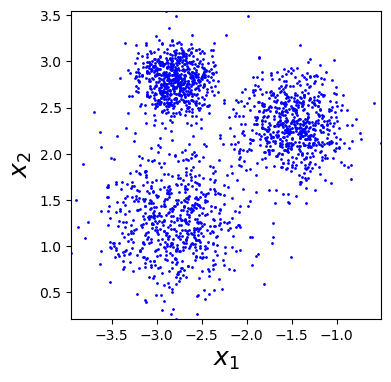

In [4]:
plt.figure(figsize=(4,4))
plt.scatter(x[:,0],x[:,1],c='b',s=1)
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)
plt.axis([x.min(axis=0)[0],x.max(axis=0)[0],x.min(axis=0)[1],x.max(axis=0)[1]])
plt.show()

In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,n_init=10,random_state=1)
kmeans.fit(x)
centroids=kmeans.cluster_centers_
centroids

array([[-2.81068805,  1.24529129],
       [-2.80113378,  2.77965066],
       [-1.48849622,  2.30353137]])

In [6]:
kmeans.inertia_

356.9648303980982

In [7]:
x_new=np.array([[-3,1.5],[-1,2],[-3,3],[-2,2]])
kmeans.predict(x_new)

array([0, 2, 1, 2])

In [8]:
kmeans.transform(x_new)

array([[0.31735712, 1.29501104, 1.71181376],
       [1.96167695, 1.96263548, 0.57511725],
       [1.7648914 , 0.29681915, 1.66424525],
       [1.1076102 , 1.11788661, 0.5947835 ]])

In [13]:
def plot_decision_boundaries(model,x,cen):
    mins=x.min(axis=0)
    maxs=x.max(axis=0)
    x1s=np.linspace(mins[0],maxs[0],1000)
    x2s=np.linspace(mins[1],maxs[1],1000)
    x1,x2=np.meshgrid(x1s,x2s)
    x_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=model.predict(x_new).reshape(x1.shape)
    plt.scatter(x[:,0],x[:,1],c='b',s=1)
    plt.contourf(x1,x2,y_pred,alpha=0.2)
    plt.contour(x1,x2,y_pred,linewidths=1,colors="k")
    plt.scatter(cen[:,0],cen[:,1],marker='x',s=5,linewidths=10,c='r',alpha=1)
    plt.axis([mins[0],maxs[0],mins[1],maxs[1]])
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18)

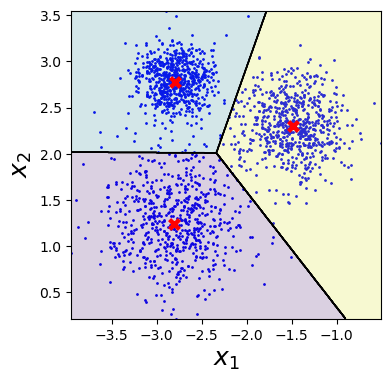

In [14]:
plt.figure(figsize=(4,4))
plot_decision_boundaries(kmeans,x,centroids)
plt.show()

In [17]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans=MiniBatchKMeans(n_clusters=3,n_init='auto',random_state=1)
minibatch_kmeans.fit(x)
minibatch_kmeans.inertia_

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


357.00432040599753

In [18]:
kmeans_k=[KMeans(n_clusters=k,random_state=1).fit(x)
         for k in range(1,10)]
inertias=[model.inertia_ for model in kmeans_k]

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

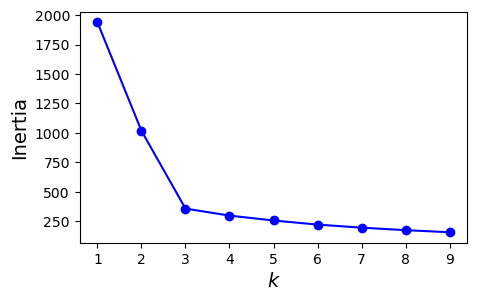

In [19]:
plt.figure(figsize=(5,3))
plt.plot(range(1,10),inertias,'bo-')
plt.xlabel('$k$',fontsize=14)
plt.ylabel('Inertia',fontsize=14)
plt.show()

In [20]:
from sklearn.metrics import silhouette_samples
silhouette_samples(x,kmeans.labels_)[:3]

array([0.75235143, 0.71019203, 0.690055  ])

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(x,kmeans.labels_)

0.6274369698447971

In [22]:
silhouette_scores=[silhouette_score(x,model.labels_)
                  for model in kmeans_k[1:]]

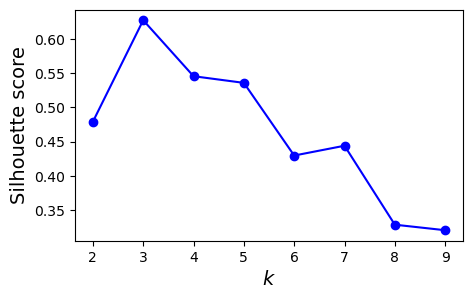

In [23]:
plt.figure(figsize=(5,3))
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.xlabel('$k$',fontsize=14)
plt.ylabel('Silhouette score',fontsize=14)
plt.show()

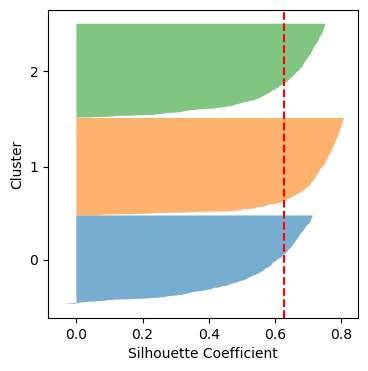

In [25]:
from matplotlib.ticker import FixedLocator,FixedFormatter
plt.figure(figsize=(4,4))
k=3
y_pred=kmeans_k[k-1].labels_
silhouette_coefficients=silhouette_samples(x,y_pred)
pos=0
ticks=[]
for i in range(k):
    coefs=(silhouette_coefficients[y_pred==i])
    coefs.sort()
    plt.fill_betweenx(np.arange(pos,pos+len(coefs)),0,coefs,alpha=0.6)
    ticks.append(pos+len(coefs)//2)
    pos+=len(coefs)
plt.axvline(x=silhouette_scores[k-2],color='r',linestyle='--')
plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=1000,noise=0.05,random_state=1)

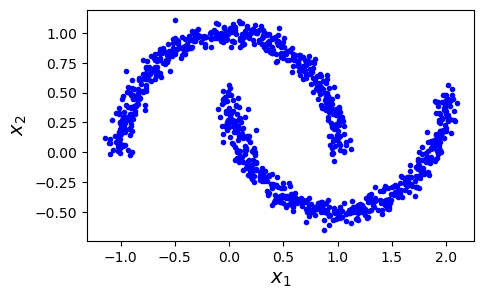

In [28]:
plt.figure(figsize=(5,3))
plt.plot(x[:,0],x[:,1],'b.')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14)
plt.show()

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbscan=DBSCAN(eps=0.07,min_samples=5)
dbscan.fit(x)
dbscan.labels_[:10]

array([ 0,  0,  1,  1,  1,  0,  1,  0, -1,  1], dtype=int64)

In [31]:
len(dbscan.core_sample_indices_)

948

In [33]:
dbscan.core_sample_indices_[:10]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10], dtype=int64)

In [34]:
dbscan.components_[:3]

array([[ 0.06645624,  0.39819469],
       [ 1.40913481, -0.48396229],
       [-0.90597929,  0.21777417]])

In [35]:
def plot_dbscan(dbscan,x):
    anom=dbscan.labels_==-1
    plt.scatter(x[~anom,0],x[~anom,1],c=dbscan.labels_[~anom],
               marker='*',s=20)
    plt.scatter(x[anom,0],x[anom,1],c='r',marker='x',s=20)
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)

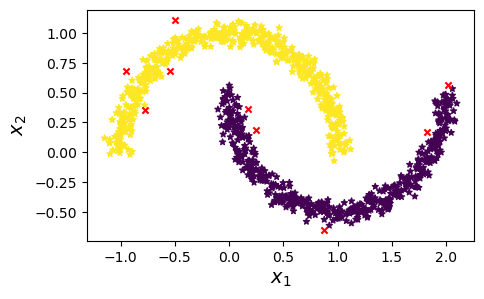

In [36]:
plt.figure(figsize=(5,3))
plot_dbscan(dbscan,x)
plt.show()

In [37]:
x_core=dbscan.components_
y_core=dbscan.labels_[dbscan.core_sample_indices_]

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_clf=Pipeline([
    ('scaler',StandardScaler()),
    ('poly_svc',SVC(kernel='poly',degree=3,coef0=1,C=10,
                   random_state=1))
])
svm_clf.fit(x_core,y_core)
x_new=np.array([[-0.5,1],[1,0.5],[0,-0.1],[2,1]])
svm_clf.predict(x_new)

array([1, 1, 0, 1], dtype=int64)

In [40]:
def plot_decision_boundary(clf,x,y):
    xmin=x.min(axis=0)
    xmax=x.max(axis=0)
    x1s=np.linspace(xmin[0]-0.2,xmax[0]+0.2,500)
    x2s=np.linspace(xmin[1]-0.2,xmax[1]+0.2,500)
    x1,x2=np.meshgrid(x1s,x2s)
    x_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(x_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,alpha=0.2)
    plt.contour(x1,x2,y_pred)

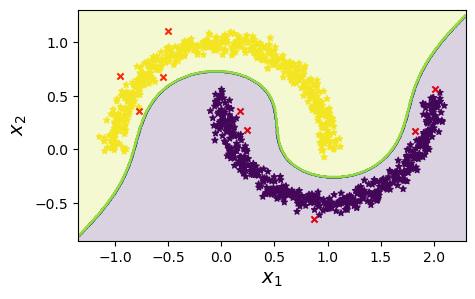

In [42]:
plt.figure(figsize=(5,3))
plot_dbscan(dbscan,x)
plot_decision_boundary(svm_clf,x,y)
plt.show()